# **Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,f_oneway
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

# **Reading files**

In [7]:
Bean_df=pd.read_csv('/content/bean_data_to_analyze_with_missing_values.csv')
Flower_df=pd.read_csv('/content/output_flower_file.csv')
Fruit_df=pd.read_csv('/content/fruit_v3_WithMissingValues.csv')

# **Combinng data sets**

In [8]:
df_Analyze=pd.merge(Bean_df,Flower_df,how='inner',on='Clone name + Refcode')
df_Analyze=pd.merge(df_Analyze,Fruit_df,how='inner',on='Clone name + Refcode')

In [9]:
df_Analyze.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3861 entries, 0 to 3860
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Clone name + Refcode  3861 non-null   object 
 1   Number                3420 non-null   float64
 2   Total wet weight      2000 non-null   float64
 3   Cotyledon dry weight  2606 non-null   float64
 4   Cotyledon length      2473 non-null   float64
 5   Cotyledon width       2473 non-null   float64
 6   Shape_x               2135 non-null   object 
 7   Colour_x              2012 non-null   object 
 8   Self compatibility    1445 non-null   object 
 9   Ovule number          2147 non-null   float64
 10  Ligule colour         2667 non-null   object 
 11  Stamen colour         2547 non-null   object 
 12  Sepal length          2615 non-null   float64
 13  Ligule width          2615 non-null   float64
 14  Style length          2615 non-null   float64
 15  Length               

# **delete duplicate values and info coulmn**

In [10]:
# df_Analyze=df_Analyze.drop_duplicates(subset=["Clone name + Refcode"])
df_Analyze.drop(columns=['Info'], inplace=True)

# **Renaming columns names**

In [11]:
# Create a dictionary where the keys are the current column names and the values are the new column names
new_column_names = {'Shape_x': 'Shape (Bean)',
                    'Colour_x': 'Colour (Bean)',
                    'Shape_y': 'Shape (Fruit)',
                    'Colour_y': 'Colour (Fruit)'}

# Use the rename() method with the dictionary to rename the columns
df_Analyze.rename(columns=new_column_names, inplace=True)

In [12]:
df_Analyze.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3861 entries, 0 to 3860
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Clone name + Refcode  3861 non-null   object 
 1   Number                3420 non-null   float64
 2   Total wet weight      2000 non-null   float64
 3   Cotyledon dry weight  2606 non-null   float64
 4   Cotyledon length      2473 non-null   float64
 5   Cotyledon width       2473 non-null   float64
 6   Shape (Bean)          2135 non-null   object 
 7   Colour (Bean)         2012 non-null   object 
 8   Self compatibility    1445 non-null   object 
 9   Ovule number          2147 non-null   float64
 10  Ligule colour         2667 non-null   object 
 11  Stamen colour         2547 non-null   object 
 12  Sepal length          2615 non-null   float64
 13  Ligule width          2615 non-null   float64
 14  Style length          2615 non-null   float64
 15  Length               

# **EDA: Correlations & Statistical Tests (before dealing with outliers & replacing missing values)**

## **Correlations**

<ipython-input-14-3e6f45282f6f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_Analyze.corr()


                        Number  Total wet weight  Cotyledon dry weight  \
Number                1.000000          0.261420             -0.257170   
Total wet weight      0.261420          1.000000              0.725780   
Cotyledon dry weight -0.257170          0.725780              1.000000   
Cotyledon length     -0.084363          0.733027              0.804687   
Cotyledon width      -0.236720          0.550056              0.795217   
Ovule number          0.457610          0.085342             -0.134468   
Sepal length         -0.141069          0.262620              0.412667   
Ligule width         -0.012348          0.243318              0.277867   
Style length          0.018840          0.029892              0.062881   
Length                0.118619          0.506776              0.439972   
Breadth               0.009643          0.605999              0.588695   
Weight                0.306204          0.355965              0.497379   
Length breadth ratio -0.010245        

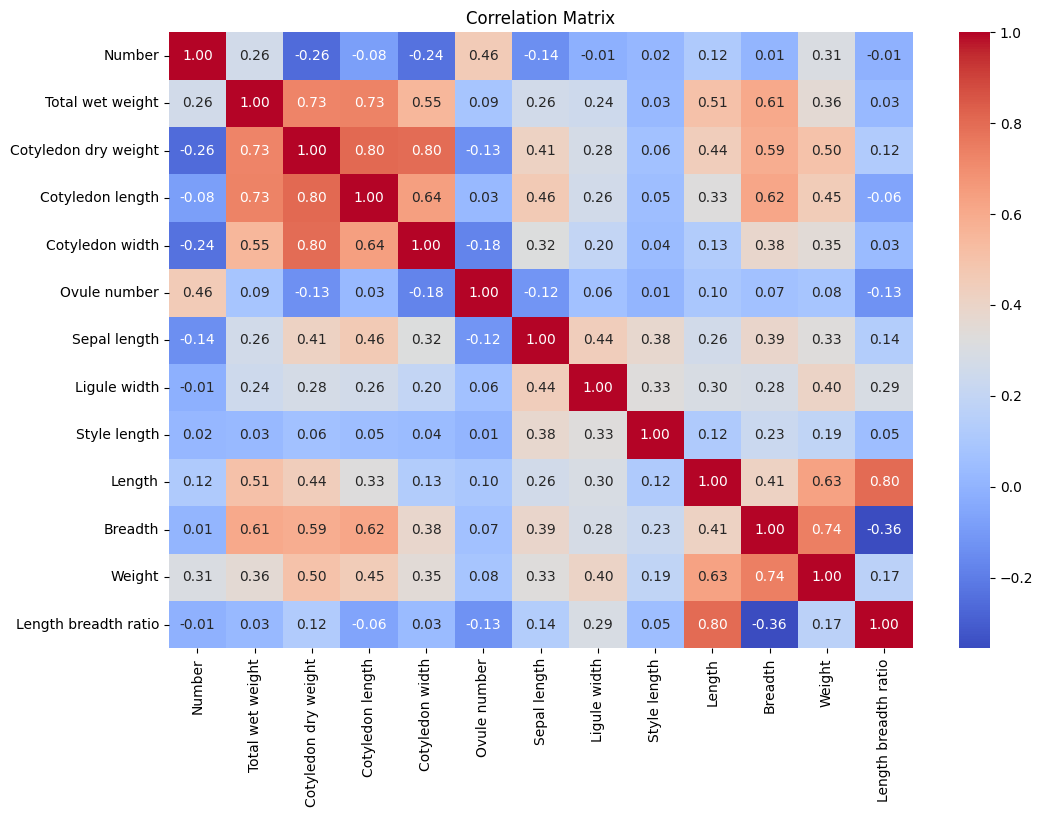

In [14]:
correlation_matrix = df_Analyze.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

According to correlations that seems interesting and the perhaps could provide meaningful insights, we're gonna display scatter plots of some of the columns pairs:

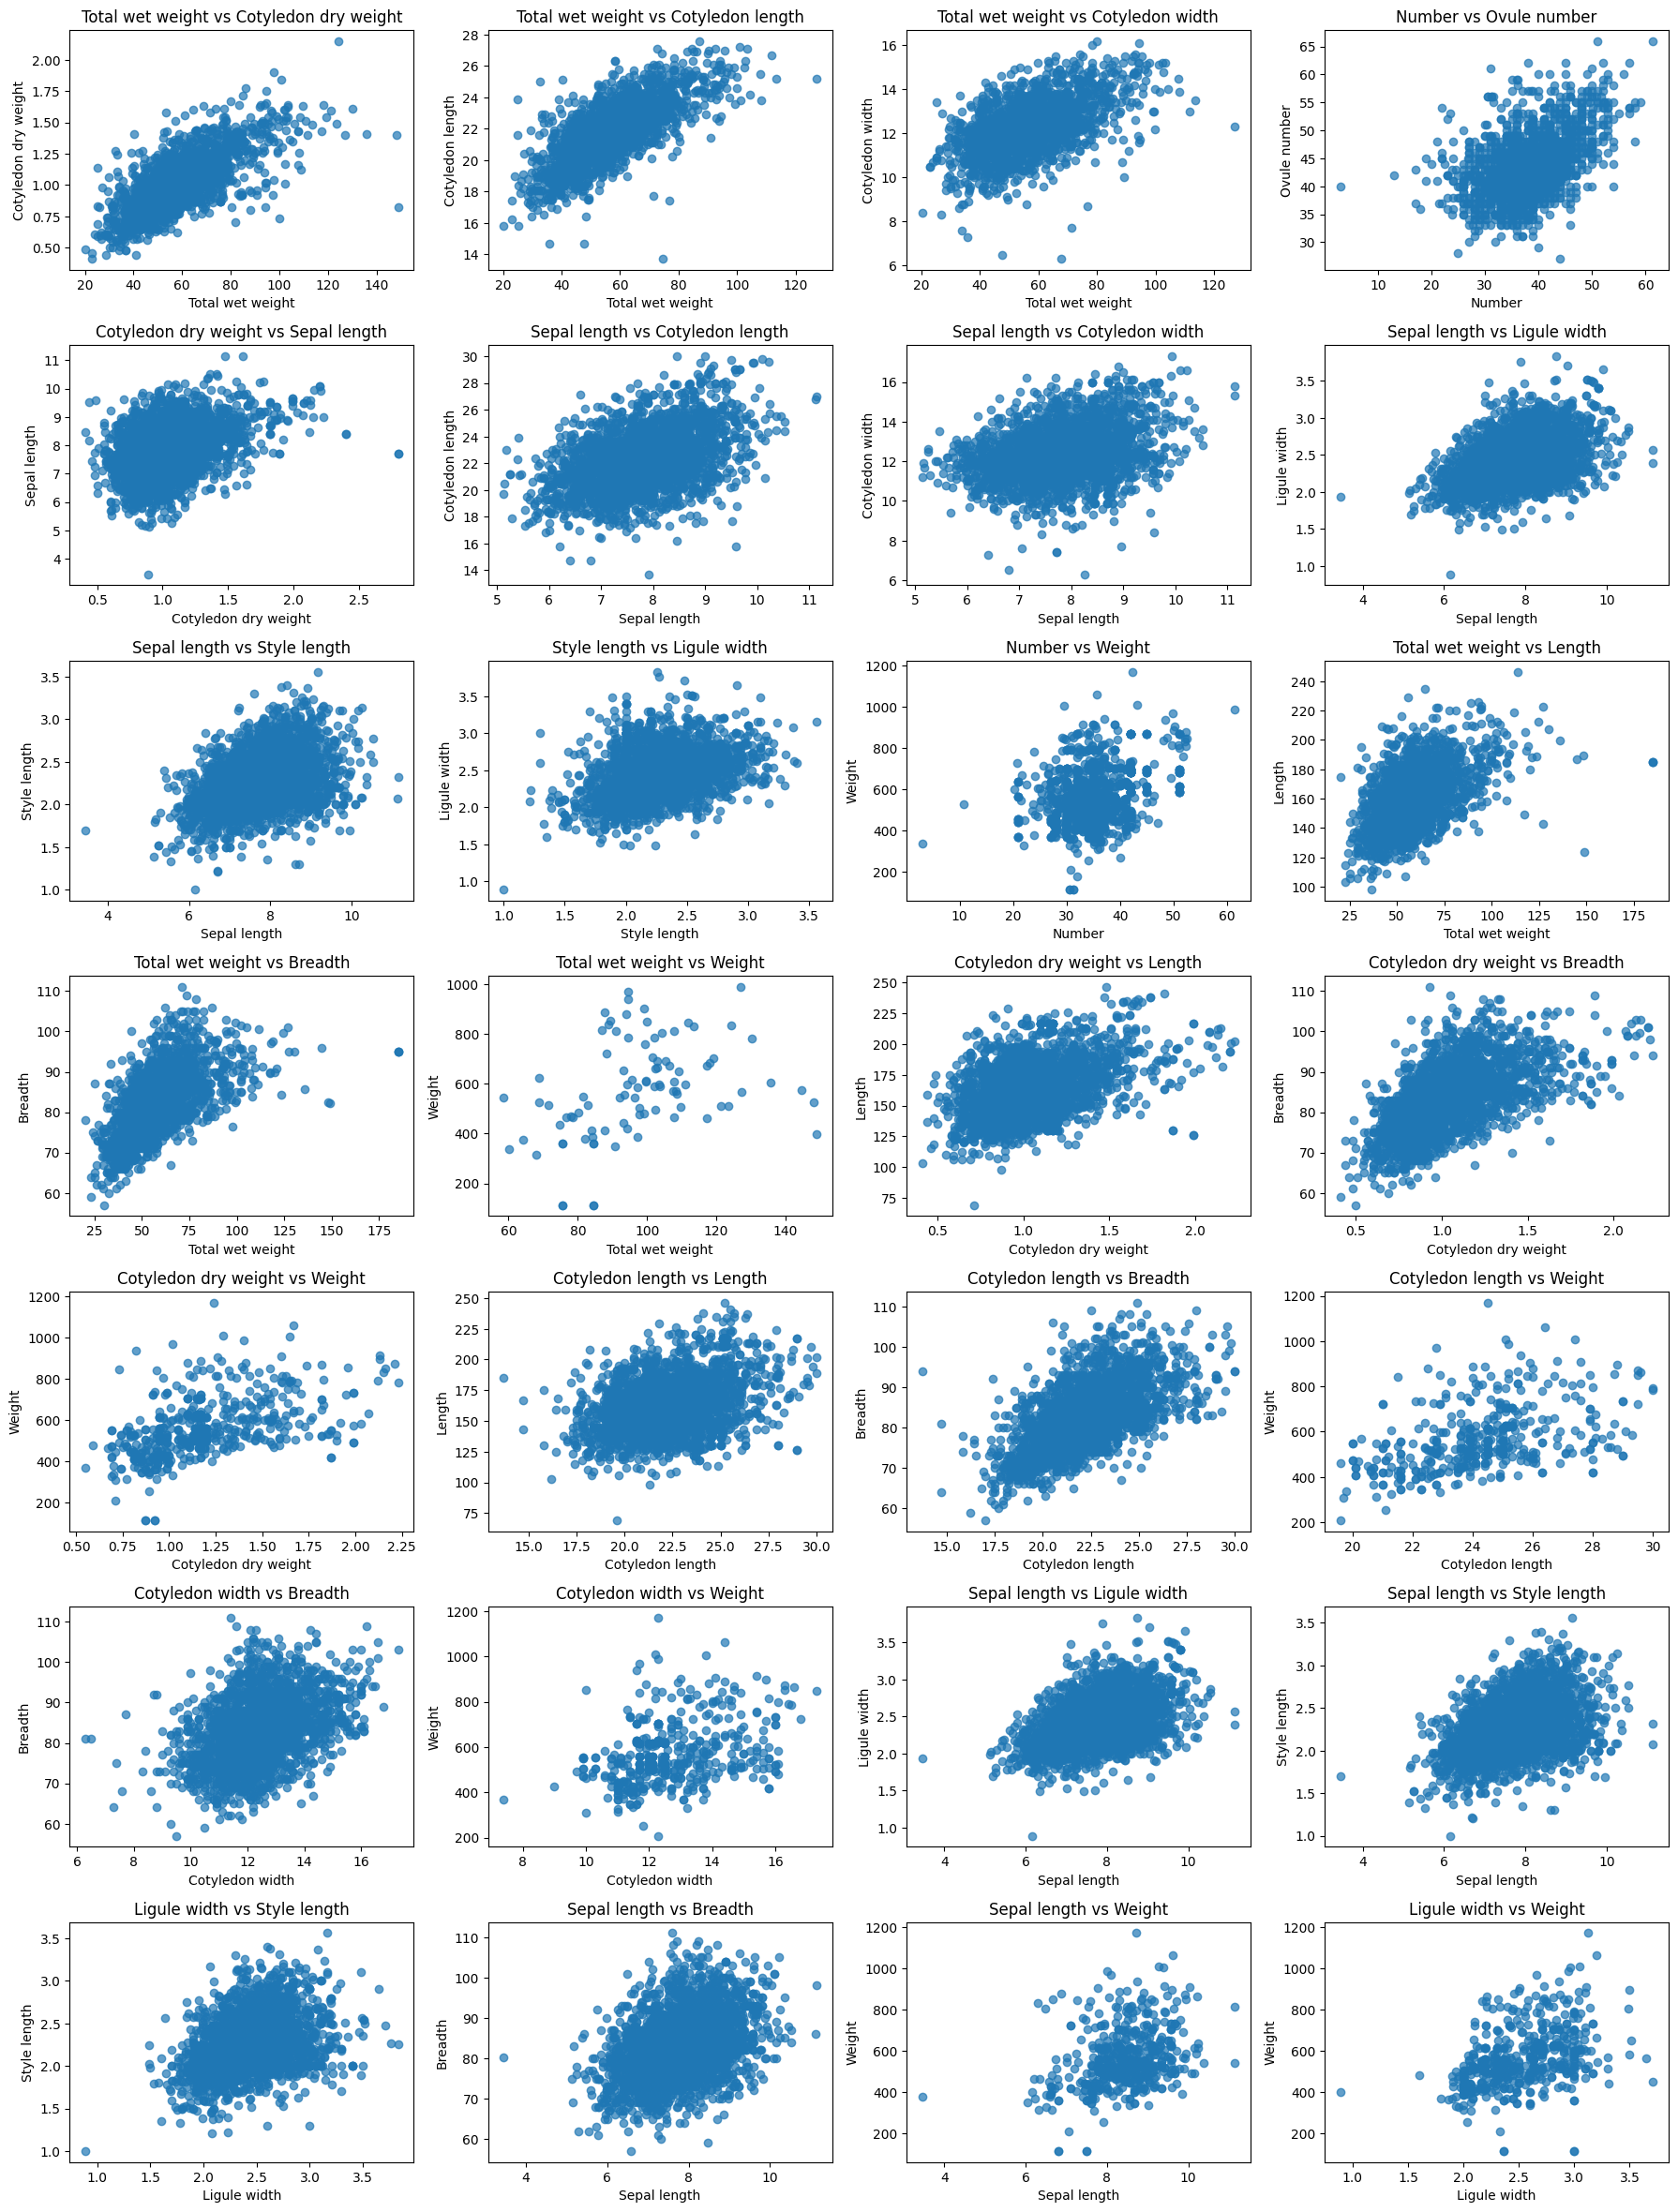

In [27]:
plt.figure(figsize=(18, 30))

pairs = [
    ('Total wet weight', 'Cotyledon dry weight'),
    ('Total wet weight', 'Cotyledon length'),
    ('Total wet weight', 'Cotyledon width'),
    ('Number', 'Ovule number'),
    ('Cotyledon dry weight', 'Sepal length'),
    ('Sepal length', 'Cotyledon length'),
    ('Sepal length', 'Cotyledon width'),
    ('Sepal length', 'Ligule width'),
    ('Sepal length', 'Style length'),
    ('Style length', 'Ligule width'),
    ('Number', 'Weight'),
    ('Total wet weight', 'Length'),
    ('Total wet weight', 'Breadth'),
    ('Total wet weight', 'Weight'),
    ('Cotyledon dry weight', 'Length'),
    ('Cotyledon dry weight', 'Breadth'),
    ('Cotyledon dry weight', 'Weight'),
    ('Cotyledon length', 'Length'),
    ('Cotyledon length', 'Breadth'),
    ('Cotyledon length', 'Weight'),
    ('Cotyledon width', 'Breadth'),
    ('Cotyledon width', 'Weight'),
    ('Sepal length', 'Ligule width'),
    ('Sepal length', 'Style length'),
    ('Ligule width', 'Style length'),
    ('Sepal length', 'Breadth'),
    ('Sepal length', 'Weight'),
    ('Ligule width', 'Weight')
]

for i, (x, y) in enumerate(pairs, start=1):
    plt.subplot(9, 4, i)
    plt.scatter(df_Analyze[x], df_Analyze[y], alpha=0.7)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

## **Statistical Tests**

,Number,Cotyledon length
Number,1.00000,-0.084363
Total wet weight,0.26142,0.733027
